## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
# Q1: 
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

In [2]:
# creating scatterplots:
import matplotlib.pyplot as plt
import seaborn as sns


**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [3]:
df = pd.read_csv('./data/airbnb_hw.csv')
df.head(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [4]:
# CLEANING 'PRICE':
# looking at datatype of Price, and then looking through the possible values
print(df['Price'].dtype)
df['Price'].unique()
# Price: need to remove the commas:
# checking if there are any Na and NaN values in the Price column
missing_price = df['Price'].isna().sum()
print(f"There are {missing_price} missing values in the price column.")

no_nan_price = df['Price'].isnull().sum()
print(f"There are {no_nan_price} NaN values in the price column.")

# converting the price column to numeric:

# first converting everything to strings, since using 'str.replace' will not work
# on numeric, float, or mixed datatypes, only works with strings
df['Price'] = df['Price'].astype(str)

# removing ',' and casting price to be numeric 
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce') #forcing other values to be na 

df['Price'].unique()

object
There are 0 missing values in the price column.
There are 0 NaN values in the price column.


array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [5]:
# CLEANING 'BEDS':
df['Beds'].unique()
df['Beds'].isna().sum() # 85 missing values - drop them

# dropping missing values for 'Beds' and storing modified 
# df as its own entity: 'df_dropped_subset'
df_dropped_subset = df.dropna(subset=['Beds'])
print(df_dropped_subset.isna().sum())

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8282
Room Type                        0
Zipcode                        133
Beds                             0
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8282
dtype: int64


In [6]:
# CLEANING NUMBER OF REVIEWS:
print(df['Number Of Reviews'].head(10)) # previewing column values
print(f"Number of missing values: {df['Number Of Reviews'].isna().sum()}")
df['Number Of Reviews'].unique()

# nothing is missing, the dtype is int64, so no changes to this column.

0     0
1     1
2     1
3     0
4    39
5     4
6     9
7    80
8    95
9    23
Name: Number Of Reviews, dtype: int64
Number of missing values: 0


array([  0,   1,  39,   4,   9,  80,  95,  23,  14, 120,  81,  17,  32,
        52,   3, 171,  16,  19,   2,  28,  62,   6,   5,  12,  40,  47,
        13,  35,  34,  68,  42,   7,  41,  15,  21,   8,  10,  29, 112,
        25, 132,  51, 156,  30,  98,  24,  74,  20, 188, 221,  57,  11,
       242,  67, 118,  60, 136, 119,  79, 106,  43,  91, 105,  96, 141,
       146,  63,  58,  18, 150,  38,  55,  89,  46,  77,  48,  36,  69,
        26,  73,  53, 165,  92,  87, 108, 109,  50, 127,  88,  83, 184,
       179,  22,  31,  82,  27, 123, 247, 190, 257, 217,  85, 103, 157,
       102,  56, 125, 115,  49,  97,  54,  65,  90,  44,  33, 100,  37,
       107, 114, 116,  61, 104,  71,  75, 145,  84,  93, 110, 172, 148,
       131, 154,  86,  64,  76, 129,  45, 180, 140,  78, 200, 175, 189,
       170, 187,  72, 137,  99, 101,  59,  94, 124, 223, 173, 151, 142,
       163, 121, 256, 248, 149, 128, 133,  66, 117, 176, 111,  70, 183,
       218, 192, 206, 161, 216, 191, 213, 178, 122, 153, 177, 16

In [7]:
# CLEANING 'REVIEW SCORE RATINGS':
df['Review Scores Rating'].head(10)
missing_reviewscores = df['Review Scores Rating'].isna().sum() # huge amount of missing values
proportion_of_missing = missing_reviewscores / len(df['Review Scores Rating'])
print(f'The proportion of missing values in the review scores column: {proportion_of_missing}')

# going to drop the missing observations and storing it in the 
# same dataframe with the ommitted missing 'Beds' observations
df_dropped_subset = df.dropna(subset=['Review Scores Rating'])
print(df_dropped_subset.isna().sum())

The proportion of missing values in the review scores column: 0.27308222324299497
Host Id                         0
Host Since                      0
Name                            0
Neighbourhood                   0
Property Type                   2
Review Scores Rating (bin)      0
Room Type                       0
Zipcode                       100
Beds                           44
Number of Records               0
Number Of Reviews               0
Price                           0
Review Scores Rating            0
dtype: int64


In [8]:
# CLEANED DATASET:
df_dropped_subset.head(10)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0
10,2571,8/27/2008,THE PUTNAM,Brooklyn,Apartment,95.0,Entire home/apt,11221.0,2.0,1,14,170,98.0
11,2758,9/6/2008,Stay at Chez Chic budget room #1,Manhattan,Apartment,90.0,Private room,10026.0,2.0,1,120,59,93.0
12,2758,9/6/2008,Stay at Chez Chic budget Room #2,Manhattan,Apartment,90.0,Private room,10026.0,2.0,1,81,49,91.0
14,2845,9/9/2008,Midtown Castle,Manhattan,Apartment,95.0,Entire home/apt,10018.0,1.0,1,17,285,97.0


In [9]:
# Q4, Part 2: maxmin normalize the data and remove any
# nan's (KMeans from sklearn doesn't accept nan input).

from sklearn.cluster import KMeans

# dropping all NaN values
clean_df = df_dropped_subset.dropna(axis=0)
# max-min scaler function:
def maxmin(x):
    return (x - x.min())/(x.max()-x.min())

# creating normalizations and adding to the dataframe:
X = clean_df.loc[:, ['Price', 'Review Scores Rating', 'Beds', 'Number Of Reviews' ]]
X = X.apply(maxmin)

X.head()


,Price,Review Scores Rating,Beds,Number Of Reviews
4,0.053954,0.950,0.1875,0.148438
5,0.013914,1.000,0.0625,0.011719
6,0.024024,1.000,0.0625,0.031250
7,0.008008,0.925,0.0625,0.308594
8,0.026026,0.875,0.1250,0.367188


In [10]:
# 3. Applying KMeans clustering with k set to 6
from sklearn.cluster import KMeans

k_bar = 6
SSE = []

for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)

for i, sse_value in enumerate(SSE, 1):  # Using a properly named variable
    print(f'k={i}, SSE={sse_value:.2f}')

from sklearn.cluster import KMeans


model = KMeans(n_clusters=k_bar, random_state=0)
clean_df['Cluster'] = model.fit_predict(clean_df[['Beds', 'Number Of Reviews', 'Review Scores Rating']])

k=1, SSE=565.67
k=2, SSE=407.06
k=3, SSE=278.16
k=4, SSE=227.43
k=5, SSE=185.93
k=6, SSE=156.59


/var/folders/f0/rhgwtvsd01lfbqlqp_ts85wh0000gn/T/ipykernel_60111/536895228.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Cluster'] = model.fit_predict(clean_df[['Beds', 'Number Of Reviews', 'Review Scores Rating']])


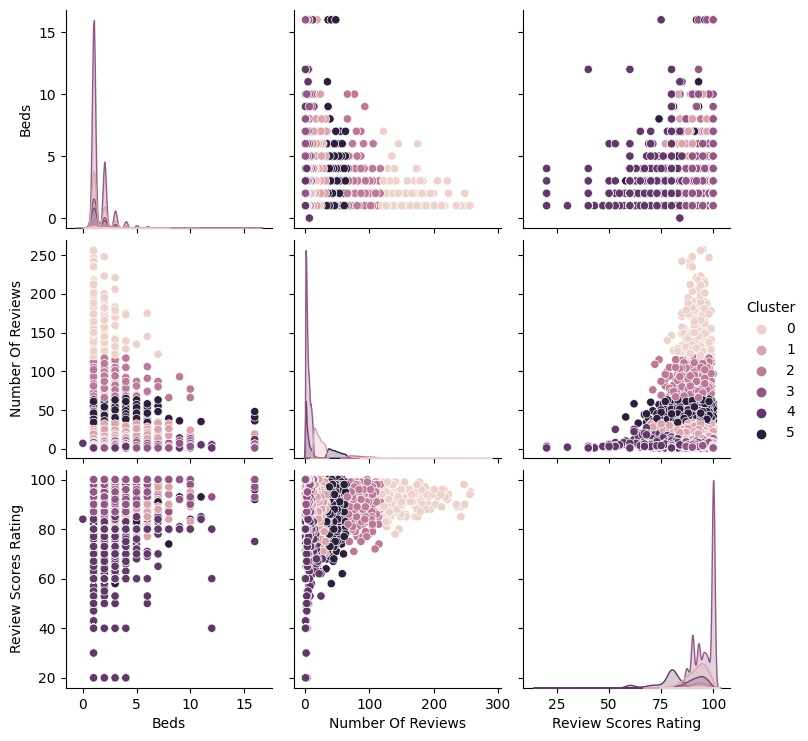

In [11]:
# 4. creating pairplot:
pairplots = sns.pairplot(clean_df, hue='Cluster', vars=['Beds','Number Of Reviews', 'Review Scores Rating'])


In [12]:
# 5. computing the average price using .groupby() and .describe()

cluster_avg_rental_price = clean_df.groupby('Cluster')['Price'].describe()
print(cluster_avg_rental_price)


           count        mean         std   min    25%    50%    75%      max
Cluster                                                                     
0          218.0  126.394495   69.793576  33.0  79.25  100.5  165.0    550.0
1         4425.0  162.404972  190.760219  20.0  89.00  135.0  195.0  10000.0
2          861.0  136.327526   85.978848  27.0  84.00  120.0  169.0    875.0
3        11521.0  159.172902  139.096718  10.0  85.00  130.0  195.0   4500.0
4         2872.0  138.566504  161.877046  21.0  70.00  105.0  170.0   5000.0
5         2113.0  147.164695   97.875154  22.0  88.00  125.0  180.0   1500.0


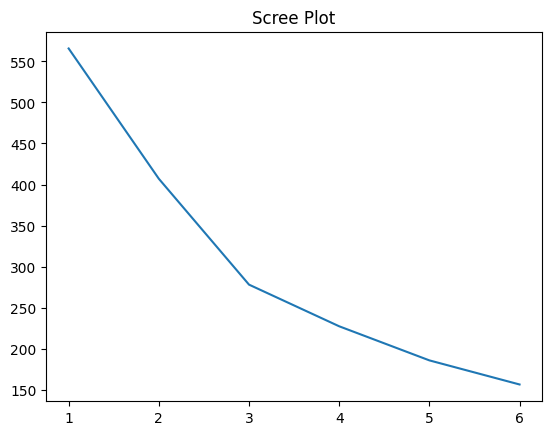

In [13]:
# 6. Repeating:

scree_plot = sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title('Scree Plot')

k=1, SSE=565.67
k=2, SSE=407.06
k=3, SSE=278.16


/var/folders/f0/rhgwtvsd01lfbqlqp_ts85wh0000gn/T/ipykernel_60111/2259428261.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Cluster'] = model.fit_predict(clean_df[['Beds', 'Number Of Reviews', 'Review Scores Rating']])


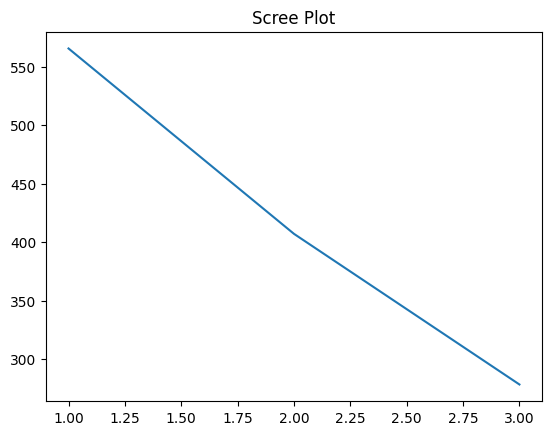

In [14]:
from sklearn.cluster import KMeans

k_bar = 3
SSE = []

for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)

for i, sse_value in enumerate(SSE, 1):  # Using a properly named variable
    print(f'k={i}, SSE={sse_value:.2f}')

from sklearn.cluster import KMeans


model = KMeans(n_clusters=k_bar, random_state=0)
clean_df['Cluster'] = model.fit_predict(clean_df[['Beds', 'Number Of Reviews', 'Review Scores Rating']])

scree_plot = sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title('Scree Plot')

Based off the scree plot, the most optimal k value would most likely be 3 rather than 6 since that's when the plot seems to flatten/ not be as steep.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?